In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

# 监督学习

监督机器学习问题主要有两种，分别叫作**分类 （classification）** 与 **回归 （regression）**。

# 鸢尾花（Iris）分类数据集
---
包含在scikit-learn 的 datasets 模块中的一个经典数据集

In [105]:
# 输出Iris数据集
from sklearn.datasets import load_iris
iris_dataset = load_iris()

## 查看数据特征

In [106]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [107]:
print(iris_dataset['target_names'])        # 预测的花的品种 
print(iris_dataset['DESCR'][:155])         # 数据集的简要说明
print("Feature names:",iris_dataset['feature_names'])       # 数据特征
print(iris_dataset['data'][:5])            # 具体数据 (np.array形式)
print(iris_dataset['target'][:5])          # 目标 (np.array形式)

['setosa' 'versicolor' 'virginica']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
   
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


## 分割数据集(训练-测试)

In [109]:
import mglearn   # 配色方案库
from sklearn.model_selection import train_test_split
X_train_Iris, X_test_Iris, y_train_Iris, y_test_Iris = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

## **class分类-散点图矩阵** ( .scatter_matrix() )

### 绘图参数
**hist_kwds** 接受一个字典作为输入,对角线上直方图的参数元组(hist_kwds={'bins': 20}--> 区间数为20)
**alpha** 透明度
**cmap=mglearn.cm3** 调用mglearn库 颜色渲染
**c** 散点颜色按照__区分

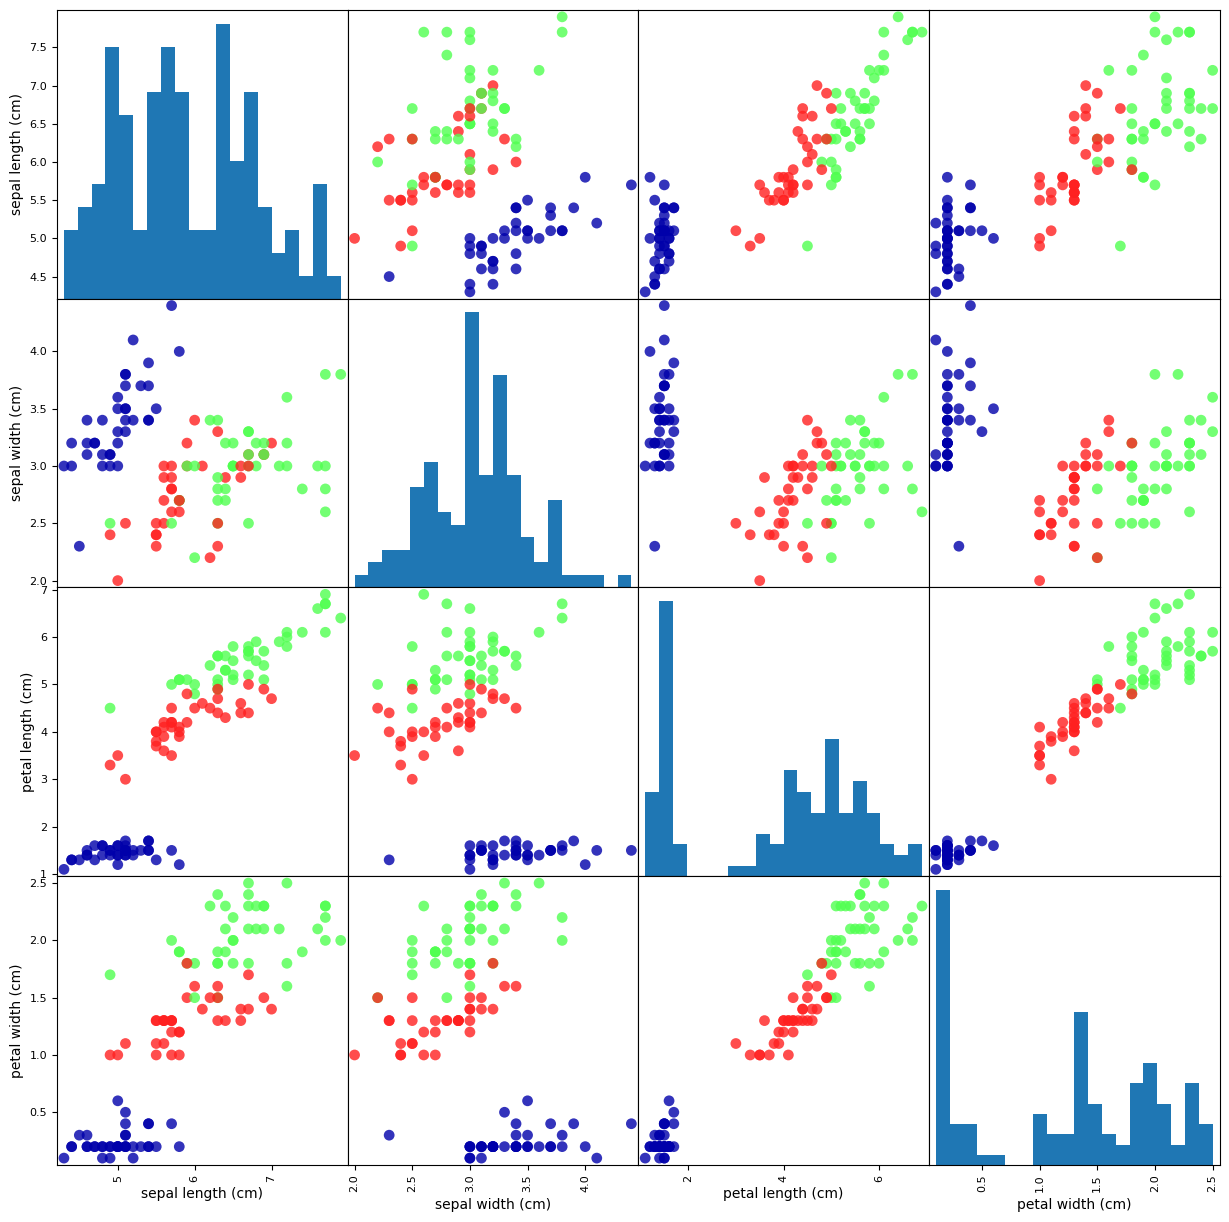

In [71]:
# 利⽤X_train中的数据创建DataFrame, 并利⽤iris_dataset.feature_names中的字符串对数据列进⾏标记
iris_dataframe = pd.DataFrame(X_train_Iris, columns=iris_dataset.feature_names)
# 利⽤DataFrame创建散点图矩阵，按y_train着⾊
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train_Iris, figsize=(15, 15), marker='o',
 hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

## 其他数据集

### forge 数据集 (⼆分类)

Text(0, 0.5, 'Second feature')

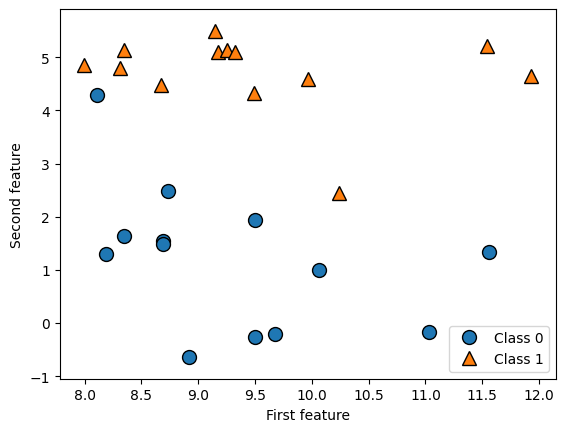

In [48]:
import mglearn 
# ⽣成数据集
X, y = mglearn.datasets.make_forge()    # 返回np.array
# 数据集绘图
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")


### wave 数据集(回归)

Text(0, 0.5, 'Target')

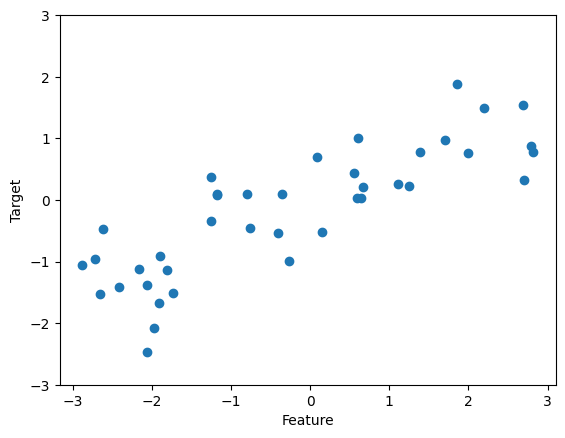

In [51]:
X_, y_ = mglearn.datasets.make_wave(n_samples=40)    # 返回np.array
plt.plot(X_, y_, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

### 威斯康星州cancer数据集(大型 二分类)

In [53]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [65]:
# 调用sklearn中的数据集 (数据均为np.array)

print(cancer['data'][:1])    # 可见该数据集具有许多特征
print(cancer['target'][:1])  # 0/1 二分类
cancer['feature_names']

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]]
[0]


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

---

# Logistic回归 LogisticRegression

给定数据$X=\{x_1,x_2,...,\}$,$Y=\{y_1,y_2,...,\}$
考虑二分类任务，即$y_i\in{\{0,1\}},i=1,2,...$, 


## **Logistic示范代码** (配合主成分分析SelectFromModel)

In [124]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

# 生成示例数据
np.random.seed(42)

X = np.random.rand(100, 3)  # 特征矩阵，100个样本，每个样本有3个特征
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # 标签，根据特征和阈值生成二分类标签


# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征缩放
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建 Logistic 回归模型
lr_model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=100)

# 特征选择
selector = SelectFromModel(estimator=LogisticRegression())
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# 在训练集上训练模型
lr_model.fit(X_train_selected, y_train)

# 在测试集上进行预测
y_pred = lr_model.predict(X_test_selected)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [83]:
print("training set y:", y_test)
print("Prediction on training set:", y_pred)

print("b,w",lr_model.intercept_,lr_model.coef_)

print("Accuracy on training set:", lr_model.score(X_train_selected, y_train))

training set y: [1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1]
Prediction on training set: [1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1]
b,w [0.] [[0.92582916 0.79524175]]
Accuracy on training set: 0.9625


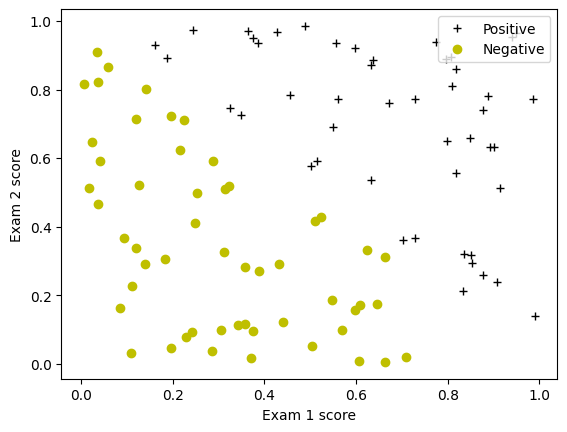

In [84]:
def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0
    
    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)
    
# Plot examples
plot_data(X, y, pos_label="Positive", neg_label="Negative")

# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()




---

# 线性回归LinearRegression

​	线性回归是比较简单的机器学习算法，通常作为机器学习入门第一课。线性回归属于线性模型的一部分。下面来看一下线性模型的定义：

> **线性模型**：给定由d个属性描述的示例$\boldsymbol{x}=\left(x_{1} ; x_{2} ; \ldots ; x_{d}\right)$，其中$x_i$是$x$在第i个属性上的取值，线性模型(linear model) 试图学得一个通过属性的线性组合来进行预测的函数，即
> $$
> f(\boldsymbol{x})=w_{1} x_{1}+w_{2} x_{2}+\ldots+w_{d} x_{d}+b
> $$
>

w[0]: 0.393906  b: -0.031804


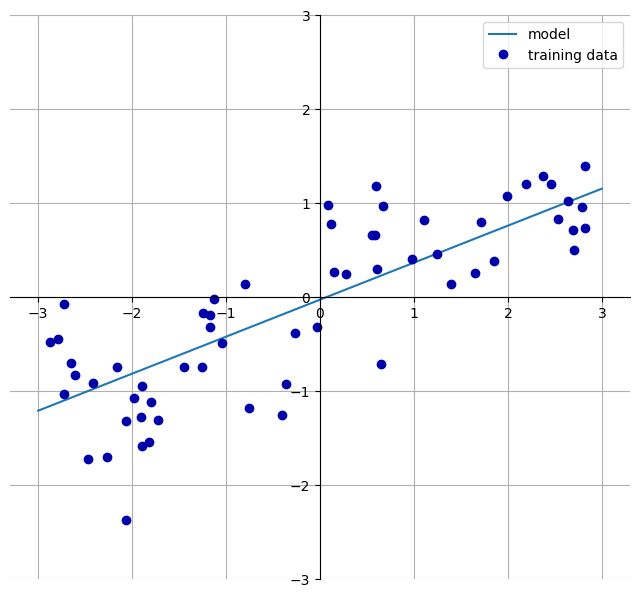

In [95]:
mglearn.plots.plot_linear_regression_wave()

## 数据生成

In [50]:
import numpy as np
import matplotlib.pyplot as plt 

def true_fun(X): # 这是我们设定的真实函数，即ground truth的模型
    return 1.5*X + 0.2

np.random.seed(0) # 设置随机种子
n_samples = 30 # 设置采样数据点的个数

'''生成随机数据作为训练集，并且加一些噪声'''
X_train = np.sort(np.random.rand(n_samples)) 
y_train = (true_fun(X_train) + np.random.randn(n_samples) * 0.05).reshape(n_samples,1)

## 定义模型
---
“斜率”参数（w ，也叫作权重或系数）被保存在 .coef_ 属性中( NumPy 数组的形式 )

偏移或截距（ b ）被保存在.intercept_ 属性中( 浮点数 )

In [51]:
from sklearn.linear_model import LinearRegression # 导入线性回归模型
model = LinearRegression() # 定义模型
model.fit(X_train[:,np.newaxis], y_train) # 训练模型
print("输出参数w：",model.coef_) # 输出模型参数w
print("输出参数b：",model.intercept_) # 输出参数b

输出参数w： [[1.4474774]]
输出参数b： [0.22557542]


## 模型测试与比较
可以看到线性回归拟合的参数是1.44和0.22，很接近实际的1.5和0.2，说明我们的算法性能还不错。
下面我们直接选取一批数据测试，然后通过画图看看算法模型与实际模型的差距。

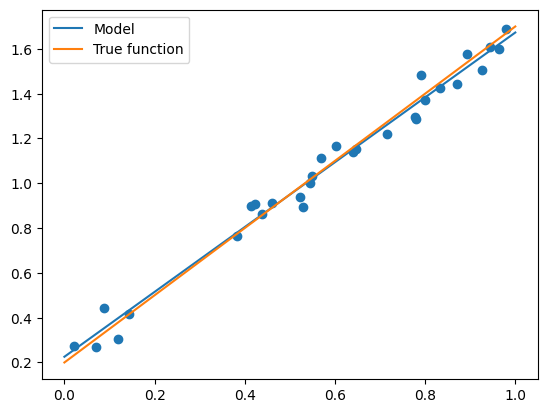

In [52]:
X_test = np.linspace(0, 1, 100)
plt.plot(X_test, model.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X_train,y_train) # 画出训练集的点
plt.legend(loc="best")
plt.show()

对于更复杂以及高维的情况，线性回归不能满足我们回归的需求，

我们需要用到更为高级一些的**多项式回归**了。

## **多项式回归**
思路一般是将$m$次多项式方程转化为$m$线性回归方程，即将$y=b_0+b_1*x+...+b_m*x^m$转换为$y=b_0*+b_1*x_1+...+b_m*x_m$（令$x_m=x^m$即可），然后使用线性回归的方法求出相应的参数。
一般实际的算法也是如此，我们将多项式特征分析器和线性回归串联，算出线性回归的参数之后倒推过去就行。

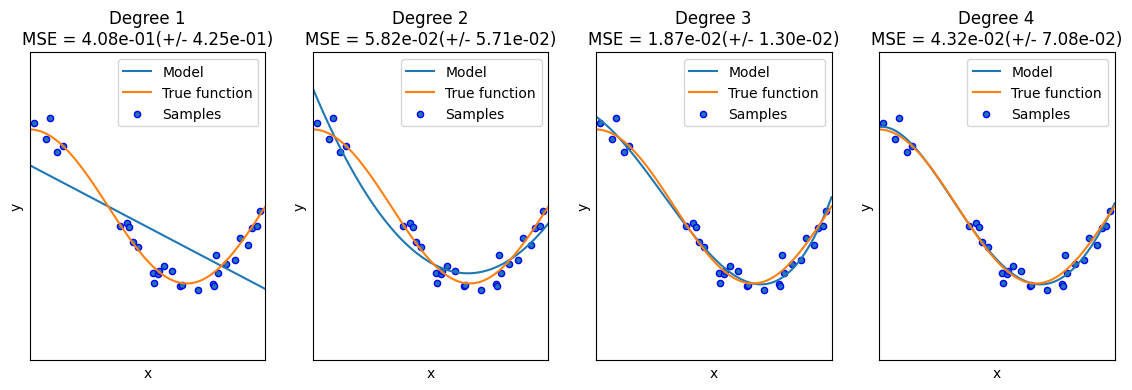

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures # 导入能够计算多项式特征的类
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X): # 这是我们设定的真实函数，即ground truth的模型
    return np.cos(1.5 * np.pi * X)
np.random.seed(0)
n_samples = 30 # 设置随机种子

X = np.sort(np.random.rand(n_samples)) 
y = true_fun(X) + np.random.randn(n_samples) * 0.1

degrees = [1,2,3,4] # 多项式最高次
plt.figure(figsize=(14, 4))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())        # .setp可以设置线的粗细以及颜色，还可以设置坐标轴的方向，位置, 刻度
    polynomial_features = PolynomialFeatures(degree=degrees[i],          # degree生成次数特征 (特征转换器)
                                             include_bias=False)         # 默认为 True 。如果为 True 的话，那么结果中就会有 0 次幂项，即全为 1 这一列。
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)]) # 使用pipline串联模型
    pipeline.fit(X[:, np.newaxis], y)           # np.newaxis 增加数组的维度，将一维数组 X 转换为二维列向量，以适应流水线中的多项式特征转换
    
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10) # 使用交叉验证
    # scoring="neg_mean_squared_error" 负均方误差（Negative Mean Squared Error）常用的回归问题评价指标。
    # 使用负值是因为 cross_val_score 函数的约定，它希望得分越大越好，但均方误差越小越好，所以取其负值。
    # cv=10 交叉验证的折数，即数据集会被分成10份，其中9份用于训练，1份用于验证，然后循环10次
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

## 岭回归( Ridge regression )
---
Ridge 是⼀种约束更强的模型，相比于普通的线性回归模型,岭回归不容易过拟合 (  L2 正则化 )

### 使用例

In [100]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_wave, y_wave = make_regression(n_features=105, n_samples=100000, noise=100, n_informative=50)

X_train_wave, X_test_wave, y_train_wave, y_test_wave = train_test_split(X_wave, y_wave, random_state=0)

ridge = Ridge(alpha = 0.1).fit(X_train_wave, y_train_wave)        # 正则化系数alpha默认为1 可以尝试提高来提升模型的泛化能力
print(f"Training set score: {ridge.score(X_train_wave, y_train_wave):.2f}")
print(f"Test set score: {ridge.score(X_test_wave, y_test_wave):.2f}")

print("输出参数w：",ridge.coef_) # 输出模型参数w
print("输出参数b：",ridge.intercept_) # 输出参数b
# Ridge regression在测试集的表现不错

Training set score: 0.94
Test set score: 0.94
输出参数w： [ 9.65983949e+01  6.17765901e+01  4.11412486e-02  6.40759623e-01
  8.39011179e+01  5.21125487e-02  1.28604504e-01 -5.31125394e-02
  5.23398842e+01  4.05223997e+01 -2.52541908e-01  2.24612868e+01
  2.81504427e+01  2.52095648e-01 -5.54183448e-01  3.68256708e+01
  5.33108955e+01  7.16751356e-01  6.67258245e+01  3.78453556e-01
 -1.51864250e-01  9.10129059e+01 -4.50928572e-01  1.85073841e+01
  9.91991341e+01 -8.99922540e-02  1.46597904e-01 -1.66644419e-01
  1.26229431e+01  5.75582994e+01  1.86339898e+01  6.79453992e+01
  1.42152783e+01  5.19158019e+01 -2.94747835e-01  6.49752806e-01
 -5.04210434e-01 -3.62937576e-01  9.65094287e+01  8.27676863e+01
  7.58723039e+01  5.76569319e+01  3.78309115e-01  2.84417493e+01
  2.59369445e+01 -2.86226453e-01  2.08172788e-01  6.26748473e+01
  2.89864505e-01  7.24869313e+01  9.33907066e+01  6.01344641e+01
  1.26356955e+01  6.50666580e-01  1.80959382e+01  7.02540677e+01
  5.56534653e+01  5.28853908e-01  2.1

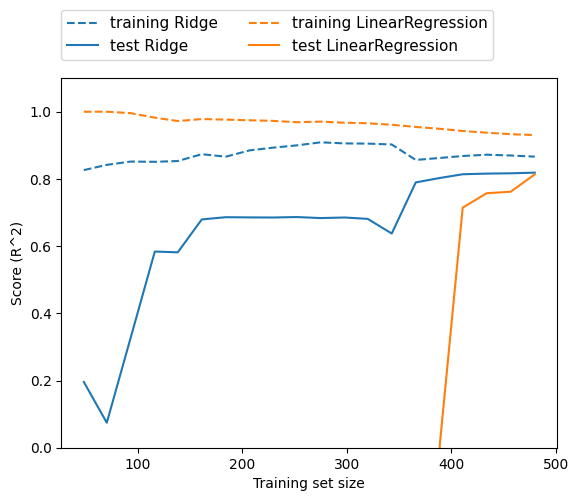

In [9]:
mglearn.plots.plot_ridge_n_samples()

**对于数据量较小的数据集(小于400个数据点), 线性回归显得不够可靠**, 而随着数据量增多, 算法的性能都得到提升

## Lasso回归
---
lasso使用 L1 正则化, 使得数据中的某些特征被忽略(自动选择特征)

注意:alpha(>=1)过大可能导致很大程度的欠拟合

alpha=0.1 的 Ridge 模型的预测性能与 alpha=0.01 的 Lasso 模型类似

### 使用例

In [91]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
# 调用wave数据集
X_wave, y_wave = make_regression(n_features=105, n_samples=85000, noise=100, n_informative=50)

X_train_wave, X_test_wave, y_train_wave, y_test_wave = train_test_split(X_wave, y_wave)

lasso =  Lasso().fit(X_train_wave, y_train_wave)        
print(f"Training set score: {lasso.score(X_train_wave, y_train_wave):.2f}")
print(f"Test set score: {lasso.score(X_test_wave, y_test_wave):.2f}")
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")        # 查看lasso使用了几个特征
print("输出参数w：",lasso.coef_) # 输出模型参数w
print("输出参数b：",lasso.intercept_) # 输出参数b

#准确识别出了50个有用特征

Training set score: 0.94
Test set score: 0.94
Number of features used: 50
输出参数w： [ 7.28462864e+01  0.00000000e+00  1.58141454e+00 -0.00000000e+00
  5.11706388e+01  0.00000000e+00  4.36804450e+01  0.00000000e+00
  1.87377336e+01  3.13132783e+01  4.52171315e+01  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  4.69241744e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  7.41025323e+01  0.00000000e+00  3.85924692e+01  2.76022337e+01
  5.37489117e+01 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  1.73329916e+01  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  5.19301202e+01
  9.54084817e+01 -0.00000000e+00  8.90335619e+01  0.00000000e+00
  8.97725402e+01 -0.00000000e+00 -0.00000000e+00  1.90167373e+01
  7.94164678e+01  3.75346969e+01 -0.00000000e+00  3.44169417e+01
 -0.00000000e+00  5.92076454e+00  6.17128311e+01  7.58679622e+01
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000

增加 max_iter 的值（运⾏迭代的最⼤次数）

减⼩alpha(降低⽋拟合)

是提升lasso模型性能的方法

## 模型选择
---
在lasso和ridge两个模型中,⼀般⾸选岭回归

如果特征很多，其中⼏个是重要的，那么选择 Lasso 可能更好

虽然弹性网络回归结合了岭回归和Lasso回归的优点，但每种模型仍有自己的特点：

1、岭回归的优点是产生稳定的预测结果，缺点是不能产生稀疏权重系数；

2、Lasso回归的优点是可以产生稀疏权重系数，缺点是不能处理高度相关的特征；

3、弹性网络回归的优点是可以处理高度相关的特征，并且能够产生稀疏权重系数和平滑的权重系数，但运算时间稍长。

##  弹性网络回归 ( ElasticNet Regression )
---
ElasticNet将L1,L2两种正则化的方法结合起来，就能够集合两种方法的优势

**但是,在数据量较大时,elastic net效果较好。在数据量较小时，有可能效果更差**

In [103]:
from sklearn.linear_model import  ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression    # 产生回归数据
# 调用wave数据集
X_wave, y_wave = make_regression(n_features=105, n_samples=85000, noise=100, n_informative=50)

X_train_wave, X_test_wave, y_train_wave, y_test_wave = train_test_split(X_wave, y_wave)

reg =  ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X_train_wave, y_train_wave)        
print(f"Training set score: {reg.score(X_train_wave, y_train_wave):.2f}")
print(f"Test set score: {reg.score(X_test_wave, y_test_wave):.2f}")

print("输出参数w：",reg.coef_) # 输出模型参数w
print("输出参数b：",reg.intercept_) # 输出参数b

Training set score: 0.95
Test set score: 0.95
输出参数w： [-8.53432495e-01  3.18318294e-01  6.50017076e+01 -0.00000000e+00
  3.05479706e-01  2.41315342e+01 -5.97494947e-01  2.31907082e-02
 -7.93452427e-02  3.10898847e+01 -2.31794710e-01  0.00000000e+00
  0.00000000e+00  8.16218071e+01 -4.86268921e-01  1.69941611e+00
 -2.96499765e-01  6.29805775e+01  8.51627894e+01  1.02490337e+01
  2.97810441e-01  9.15631741e+01  5.46656329e-01 -2.60190855e-01
  5.30670711e+01  1.89956156e-02 -5.41322969e-01 -8.59378753e-01
  1.77128432e-01  8.79040859e+01  3.85568491e+01  1.25197332e-01
  3.08106085e-01  6.71526986e+01  7.51365941e+01 -0.00000000e+00
  1.96843480e+00  6.81146495e+01  7.14875802e+01  5.02244273e+01
  8.93885340e+01  8.05630630e+01  1.53294652e-01  3.53985178e-02
  0.00000000e+00  7.25380764e-01  1.77866246e-01 -1.33976845e-01
  3.10774540e+01 -5.74146417e-02  5.03651429e+01  4.22284298e+00
  3.74963503e+01  2.27989024e-01  5.20240831e-01 -4.39906410e-01
  5.79093662e+01 -3.84395710e-01  7.5

## 回归测试数据生成make_regression
---
```
from sklearn.datasets import make_regression

make_regression(n_samples=100, n_features=100, n_informative=10, n_targets=1, bias=0.0, 
    effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)
```


### 调参

**n_samples**：样本数

**n_features**：特征数(自变量个数)

**n_informative**：参与建模特征数

**n_targets**：因变量个数

**noise**：噪音

**bias**：偏差(截距)

**coef**：是否输出coef标识

**random_state**：随机状态若为固定值则每次产生的数据都一样

In [ ]:
# 测试用参数
make_regression(n_features=105, n_samples=85000, noise=100, n_informative=50)

---

# ⽤于分类的线性模型
---
分为 ⼆分类 和 多分类

## 二分类
**（⼆元）线性分类器是利⽤直线、平⾯或超平⾯来分开两个类别的分类器**

### 线性⽀持向量机 （linear supportvector machine）

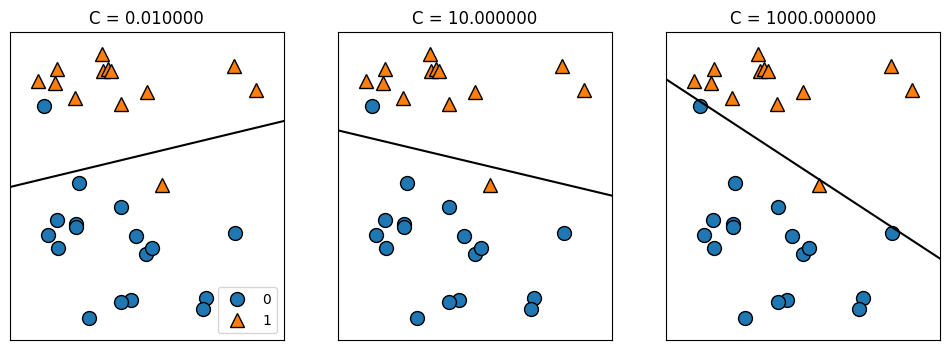

In [104]:
mglearn.plots.plot_linear_svc_regularization() # C戴表正则化系数 值越⼤，对应的正则化越弱

# 较⼩的 C 值可以让算法尽量适应“⼤多数”数据点，⽽较⼤的C值更强调每个数据点都分类正确的重要性(更关注分类错误的样本)。

In [118]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_Iris,y_train_Iris)
print("train score:",svc.score(X_train_Iris,y_train_Iris))
print("test score:",svc.score(X_test_Iris,y_test_Iris))

train score: 0.9821428571428571
test score: 0.9210526315789473


C:\Users\36085\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## 多分类
---

将⼆分类算法推⼴到多分类算法的⼀种常⻅⽅法是**“⼀对其余 ”（one- vs.-rest）⽅法**


### 生成多分类数据 make_blobs / make_class

#### make_blobs聚类数据生成器

```
sklearn.datasets.make_blobs(n_samples=100, n_features=2,centers=3, cluster_std=1.0, 
             center_box=(-10.0, 10.0), shuffle=True,     random_state=None)[source]
```
**n_samples**是待生成的样本的总数。

**n_features**是每个样本的特征数。

**centers**表示类别数。

**cluster_std**表示每个类别的方差，例如我们希望生成2类数据，其中一类比另一类具有更大的方差，可以将cluster_std设置为[1.0,3.0]。

#### make_classification

```
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10, 
            n_informative=5, n_redundant=2, n_classes=2, random_state=123)
```
**n_samples**：生成样本的数量，默认为100

**n_features**：生成样本的特征数，默认为20

**n_informative**：生成样本中有用的特征数量。这个参数只有当数据集的分类数为2时才有效，默认为2

**n_redundant**：生成样本中冗余特征的数量，这些特征是从有用特征中随机组合而成的，默认为2

**n_classes**：数据集分类的数量，默认为2

**random_state**：随机数的种子，默认为None

### SVC多分类one- vs -rest示例

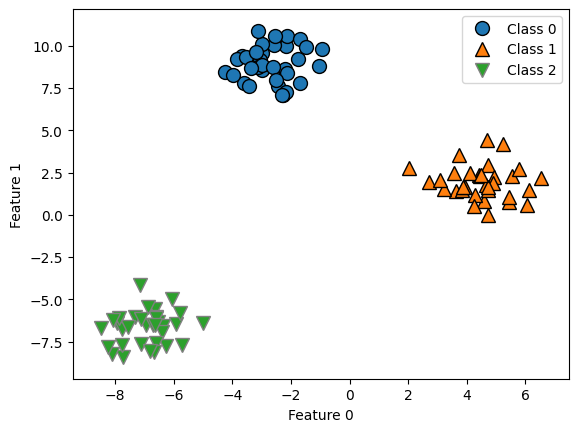

In [133]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [141]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: \n", linear_svm.coef_)
print("Intercept shape: ", linear_svm.intercept_)

#coef_ 的形状是 (3, 2) ，说明 coef_ 每⾏包含三个类别之⼀的系数向量，每列包含某个特征（这个数据集有 2 个特征）对应的系数值。
#intercept_ 是⼀维数组，保存每个类别的截距

Coefficient shape: 
 [[-0.17492509  0.23140913]
 [ 0.47621707 -0.06936546]
 [-0.18914103 -0.20400549]]
Intercept shape:  [-1.07745751  0.13140636 -0.0860499 ]


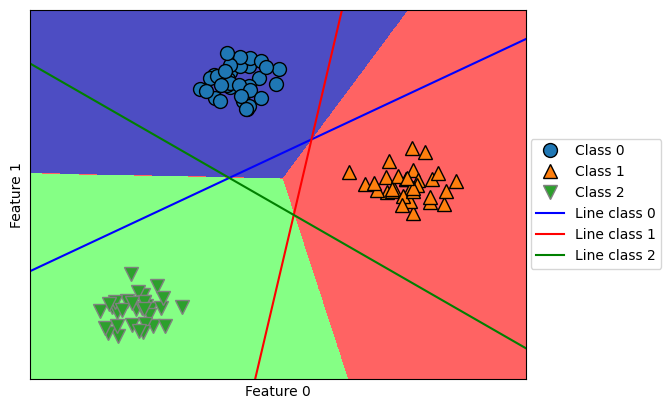

In [147]:
# 分类可视化

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g']):
     plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)  # 记住格式:-(line * coef[0] + intercept) / coef[1] 作为y输出

# 设置刻度
plt.ylim(-10, 15)      
plt.xlim(-10, 8)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1','Line class 2'], loc=(1.01, 0.3))

mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)   #填充

# 对模型系数的解释
---
以**logistic回归**为例

C:\Users\36085\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\36085\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

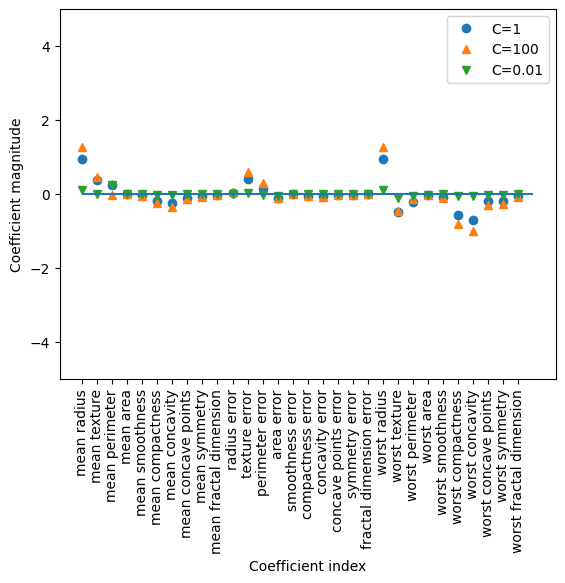

In [127]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

从途中可以看出, 各个特征的w, w>0说明对数据结果的正向作用

---

# 基于Tensorflow的神经网络
---

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.activations import sigmoid

C:\Users\36085\anaconda3\Lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (2.0.4) or chardet (4.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn(


## 简易实例演示

In [3]:
# 生成数据来做演示
def load_coffee_data():
    """ Creates a coffee roasting data set.
        roasting duration: 12-15 minutes is best
        temperature range: 175-260C is best
    """
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1,2)
    X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
    X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
    Y = np.zeros(len(X))
    
    i=0
    for t,d in X:
        y = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1,1))

In [4]:
#数据处理

X,Y = load_coffee_data();    #载入数据

#标准化 tf.keras.layers.Normalization(axis=-1)
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)

Xt = np.tile(Xn,(1000,1))
Yt= np.tile(Y,(1000,1))   
print(Xt.shape, Yt.shape)   

(200000, 2) (200000, 1)


In [9]:
#建立模型
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(2,)), # 指定输入的预期形状
        Dense(10, activation='relu', name = 'layer1'),
        Dense(5, activation='relu', name = 'layer2'),
        Dense(1, activation='sigmoid', name = 'layer3')
     ]
)

model.summary()  # 查看神经网络层

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 10)                30        
                                                                 
 layer2 (Dense)              (None, 5)                 55        
                                                                 
 layer3 (Dense)              (None, 1)                 6         
                                                                 
Total params: 91 (364.00 Byte)
Trainable params: 91 (364.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
#定义损失函数 指定编译优化
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    # .BinaryCrossentropy() 二元交叉熵(用于二进制分类)
    # .MeanSquaredError() 均方差
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,            
    epochs=10,       # 训练过程中数据将被“轮”多少次
)

Epoch 1/10
6250/6250 [==============================] - 5s 731us/step - loss: 0.0273
Epoch 2/10
6250/6250 [==============================] - 4s 712us/step - loss: 0.0064
Epoch 3/10
6250/6250 [==============================] - 5s 724us/step - loss: 0.0081
Epoch 4/10
6250/6250 [==============================] - 5s 737us/step - loss: 0.0034
Epoch 5/10
6250/6250 [==============================] - 5s 742us/step - loss: 0.0070
Epoch 6/10
6250/6250 [==============================] - 4s 702us/step - loss: 0.0019
Epoch 7/10
6250/6250 [==============================] - 4s 694us/step - loss: 0.0107
Epoch 8/10
6250/6250 [==============================] - 4s 703us/step - loss: 0.0145
Epoch 9/10
6250/6250 [==============================] - 4s 702us/step - loss: 0.0112
Epoch 10/10
6250/6250 [==============================] - 4s 694us/step - loss: 0.0176


In [11]:
# 获取权重和偏置

W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 10):
 [[-2.2406418  -0.9802679  -0.06232077  2.230285   -1.5823936   1.7815577
   0.13823926 -0.4074776  -2.7133286   3.1496954 ]
 [-1.3021085   0.77588755 -2.4483364   1.6628952   1.2283663   2.3848605
   1.8069962   1.0942248   0.64182085  2.3458726 ]] 
b1(10,): [-2.1824245  -0.32956275 -2.6352777  -0.57166296  1.1386663   0.4378503
  2.5259619  -1.8363202  -2.1259353   0.39012384]
W2(10, 5):
 [[-4.1755805   0.4501143   0.502594    3.8021817   1.5780007 ]
 [ 0.0835889  -1.1028105   2.0846734   1.8266487   0.6883171 ]
 [ 0.322118   -3.1693857   5.737887    2.0193295   1.2007824 ]
 [ 0.19706833 -1.7002335   0.9173501  -0.5676671  -1.0517547 ]
 [-2.2481167  -0.29146895 -1.0998275  -0.6060038  -1.1818174 ]
 [ 4.6469617  -3.7152743   6.69215     5.9199324   1.3027923 ]
 [-1.1423651   0.75685245 -1.8969601  -1.9589473  -2.7798805 ]
 [-0.4114025   1.1470134   0.9645929   1.2564152   0.49870783]
 [-1.6622587  -8.408683    7.1086135   8.73486     3.8020678 ]
 [ 4.1702447  -8.8336315   8

In [12]:
# 测试神经网络
X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example

X_testn = norm_l(X_test)  # 标准化

predictions = model.predict(X_testn)
print("predictions = \n", predictions)

yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

1/1 [==============================] - 0s 72ms/step
predictions = 
 [[0.99989426]
 [0.        ]]
decisions = 
[[1]
 [0]]


## 激活函数
---
**ReLU** 最常用,多用于隐藏层 (不会发生神经网络的梯度消失问题， 能够加速梯度下降的收敛速度)

**sigmoid** 适用于二分结果(0/1) 

## Softmax回归算法

In [8]:
from sklearn.datasets import make_blobs
# make dataset for example
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

print(X_train, y_train)

#下面判断x_train的各个点属于哪类

[[ 1.55508243  0.84801682]
 [-5.33749882  1.03397255]
 [-4.09353183  0.67843096]
 ...
 [-0.84437575 -1.94991543]
 [ 5.0377068  -2.92221685]
 [ 0.38198674  1.49735733]] [2 0 0 ... 1 3 2]


In [9]:
# '减小误差'的Softmax神经网络架构
preferred_model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')   # 一共4类 所以设置4层
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),                             # Adam算法
)

preferred_model.fit(
    X_train,y_train,
    epochs=10
)

Epoch 1/10
63/63 [==============================] - 0s 682us/step - loss: 1.3191
Epoch 2/10
63/63 [==============================] - 0s 641us/step - loss: 0.7454
Epoch 3/10
63/63 [==============================] - 0s 641us/step - loss: 0.3503
Epoch 4/10
63/63 [==============================] - 0s 626us/step - loss: 0.1666
Epoch 5/10
63/63 [==============================] - 0s 671us/step - loss: 0.1060
Epoch 6/10
63/63 [==============================] - 0s 658us/step - loss: 0.0805
Epoch 7/10
63/63 [==============================] - 0s 639us/step - loss: 0.0671
Epoch 8/10
63/63 [==============================] - 0s 660us/step - loss: 0.0590
Epoch 9/10
63/63 [==============================] - 0s 634us/step - loss: 0.0534
Epoch 10/10
63/63 [==============================] - 0s 655us/step - loss: 0.0489


In [10]:
# softmax 输出

p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

#注意改进版softmax直接输出的不是概率

63/63 [==============================] - 0s 549us/step
two example output vectors:
 [[-2.0705833 -0.8292566  3.5305037 -0.7524438]
 [ 0.6881649 -4.1431746 -5.052561  -7.6691985]]
largest value 9.656906 smallest value -13.28885


In [13]:
# .softmax转换为概率

sm_preferred = tf.nn.softmax(p_preferred).numpy()          
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

# 找出最大概率(即归属的类)
for i in range(5):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

two example output vectors:
 [[3.5852937e-03 1.2405839e-02 9.7061265e-01 1.3396318e-02]
 [9.8870599e-01 7.8857522e-03 3.1761555e-03 2.3201188e-04]]
largest value 0.9999938 smallest value 3.1060708e-08
[-2.0705833 -0.8292566  3.5305037 -0.7524438], category: 2
[ 0.6881649 -4.1431746 -5.052561  -7.6691985], category: 0
[ 0.40999675 -3.023532   -3.8927007  -6.1090136 ], category: 0
[-3.5779688  3.2629995 -2.3619509 -2.192639 ], category: 1
[-2.1476529 -3.9148297  2.7644544 -5.0096793], category: 2


---

# XGBboost 极度梯度提升树
---

In [14]:
# 在sklearn库中的简单调用:
from xgboost import XGBClassifier       # xgboost分类

# model = XGBClassifier()
# model.fit(x,y)
# y_pred = model.predict(x_test)

from xgboost import XGBRegressor        # xgboost回归

# model = XGBRegressor()
# model.fit(x,y)
# y_pred = model.predict(x_test)

# 决策树/随机森林
---

# k-近邻算法
---
KNN的全称是K Nearest Neighbors，意思是K个最近的邻居，可以用于分类和回归，是一种监督学习算法。它的思路是这样，如果一个样本在特征空间中的K个最相似(即特征空间中最邻近)的样本中的大多数属于某一个类别，则该样本也属于这个类别。也就是说，该方法在定类决策上只依据最邻近的一个或者几个样本的类别来决定待分样本所属的类别。

sklearn 库的 neighbors 模块实现了KNN 相关算法，其中：
- `KNeighborsClassifier` 类用于分类问题
- `KNeighborsRegressor` 类用于回归问题

这两个类的构造方法基本一致，这里我们主要介绍 KNeighborsClassifier 类，原型如下：

```python
KNeighborsClassifier(
	n_neighbors=5, 
	weights='uniform', 
	algorithm='auto', 
	leaf_size=30, 
	p=2, 
	metric='minkowski', 
	metric_params=None, 
	n_jobs=None, 
	**kwargs)
```


## KNN算法的优缺点

**优点**
- KNN是一种较为成熟的算法，同时思路也比较简单，能够同时兼容回归与分类（KNN的回归将在日后的回归算法中提到）。
- KNN时间复杂度为O(n)。因为是懒惰学习，在训练阶段速度比较快。
- 可以用于非线性分类。
- 未对数据进行任何假设，因此对异常点不敏感。
- 通过近邻而不是通过类域判别，对类域交叉重叠“较多的样本具有较好的预测效果。

**缺点**
- 在特征较多的情况下，会有很大的计算量。
- 需要存储所有的训练数据，对内存要求高。
- 因为是懒惰学习（在测试样本阶段学习），预测阶段速度比较慢。
- 在样本不平衡时，容易造成误判。
- 对数据规模敏感。在大的训练集中有较高正确率，当规模小的时候正确率低。

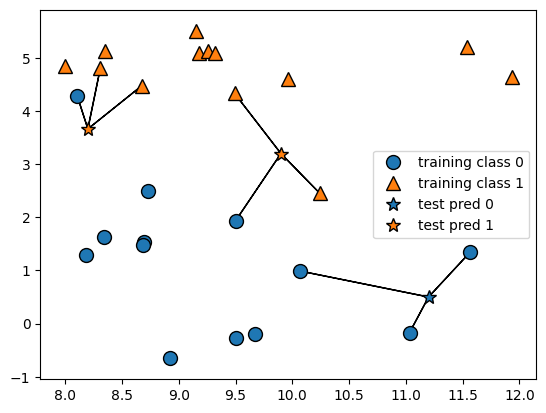

In [69]:
# 展示k近邻分类器的工作原理
mglearn.plots.plot_knn_classification(n_neighbors=3)

## 特征调参
**来看下几个重要参数的含义：**
- **n_neighbors**：即 KNN 中的 K 值，一般使用默认值 5。
- **weights**：用于确定邻居的权重，有三种方式：
    - weights = uniform，表示所有邻居的权重相同。
    - weights = distance，表示权重是距离的倒数，即与距离成反比。
    - 自定义函数，可以自定义不同距离所对应的权重，一般不需要自己定义函数。
- **algorithm**：用于设置计算邻居的算法，它有四种方式：
    - algorithm = auto，根据数据的情况自动选择适合的算法。
    - algorithm = kd_tree，使用 KD 树 算法。
        - KD 树是一种多维空间的数据结构，方便对数据进行检索。
        - KD 树适用于维度较少的情况，一般维数不超过 20，如果维数大于 20 之后，效率会下降。
    - algorithm = ball_tree，使用球树算法。
        - 与KD 树一样都是多维空间的数据结构。
        - 球树更适用于维度较大的情况。
    - algorithm = brute，称为暴力搜索。
        - 它和 KD 树相比，采用的是线性扫描，而不是通过构造树结构进行快速检索。
        - 缺点是，当训练集较大的时候，效率很低。
    - leaf_size：表示构造 KD 树或球树时的叶子节点数，默认是 30。
            调整 leaf_size 会影响树的构造和搜索速度。

## KNN分类

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
# 调用KNN进行fit
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_Iris, y_train_Iris)    # Iris数据

KNeighborsClassifier(n_neighbors=3)

In [75]:
# 预测新数据
X_new_Iris = np.array([[5, 2.9, 1, 0.2]])
y_prediction_Iris = knn.predict(X_new_Iris)
print(iris_dataset['target_names'][y_prediction_Iris])     # 输出结果

['setosa']


### KNN分类模型**评估**得分( .score )

In [76]:
knn.score(X_test_Iris, y_test_Iris)

0.9736842105263158

score数据含义: '对于测试集中的鸢尾花，我们的预测有约 97% 是正确的'

---

### 决策边界 与 近邻值

使用forge数据集进行演示

随着邻居个数越来越多，决策边界也越来越平滑。更平滑的边界对应更简单的模型。换句话说，使⽤更少的邻居对应更⾼的模型复杂度
⽽使⽤更多的邻居对应更低的模型复杂度

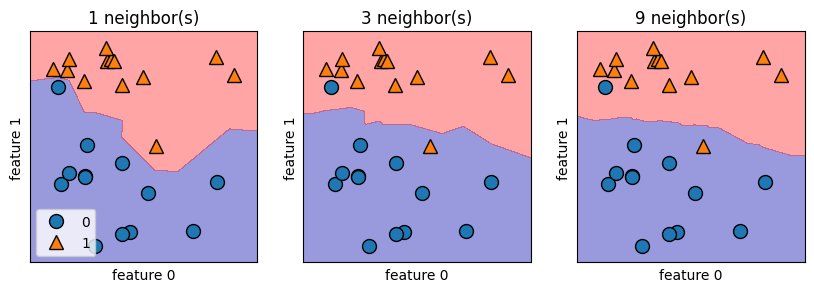

In [85]:
# 调用forge并分隔数据
from sklearn.model_selection import train_test_split
X_forge, y_forge = mglearn.datasets.make_forge()
X_train_forge, X_test_forge, y_train_forge, y_test_forge = train_test_split(X_forge, y_forge, random_state=0)


fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
 # fit⽅法返回对象本⾝，所以我们可以将实例化和拟合放在⼀⾏代码中
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_forge, y_forge)
    mglearn.plots.plot_2d_separator(clf, X_forge, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X_forge[:, 0], X_forge[:, 1], y_forge, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)


### 不同 n_neighbors 值的精确度曲线
---
使用cancer数据集

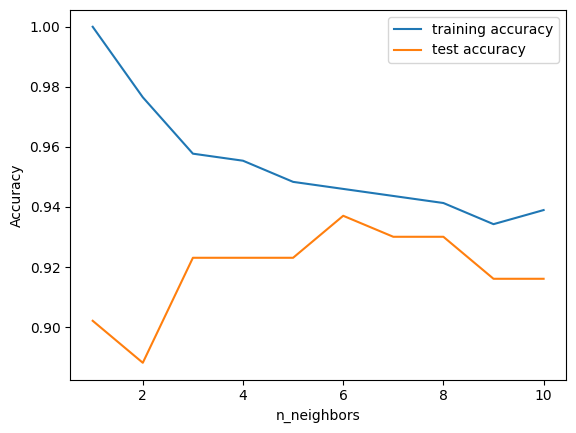

In [87]:
#调用cancer数据
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#分割数据
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
# stratify=y作为分类依据

training_accuracy = []
test_accuracy = []

# n_neighbors取值从1到10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # 构建模型
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # 记录训练集精度
    training_accuracy.append(clf.score(X_train, y_train))
    # 记录泛化精度
    test_accuracy.append(clf.score(X_test, y_test))

#绘图  
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


## KNN回归
---


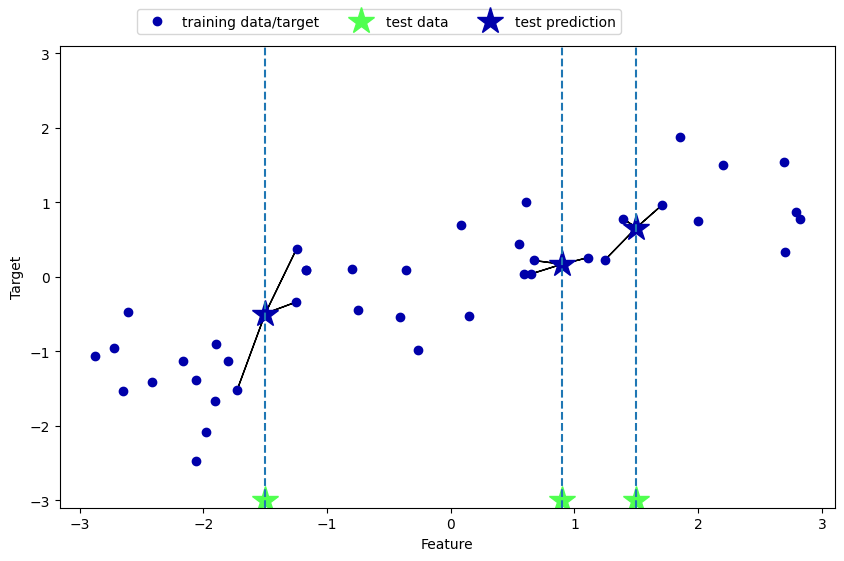

In [88]:
# 展示了KNN回归的工作原理
mglearn.plots.plot_knn_regression(n_neighbors=3)
# 在使⽤多个近邻时，预测结果为这些邻居的平均值

### <k邻近回归>工作实例
---
使用wave数据集

In [90]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# 将wave数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 模型实例化，并将邻居个数设为3
reg = KNeighborsRegressor(n_neighbors=3)

# 利⽤训练数据和训练⽬标值来拟合模型
reg.fit(X_train, y_train)

print(f"Test set predictions:\n{reg.predict(X_test)}")
print(f"Test set R^2: {reg.score(X_test, y_test):.2f}")

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


### 预测曲线 与 近邻值
---
仅使⽤单⼀邻居，训练集中的每个点都对预测结果有显著影响，预测结果的图像经过所有数据点。这导致预测结果⾮常不稳定。考虑更多的邻居之后，预测结果变得更加平滑，但对训练数据的拟合也不好

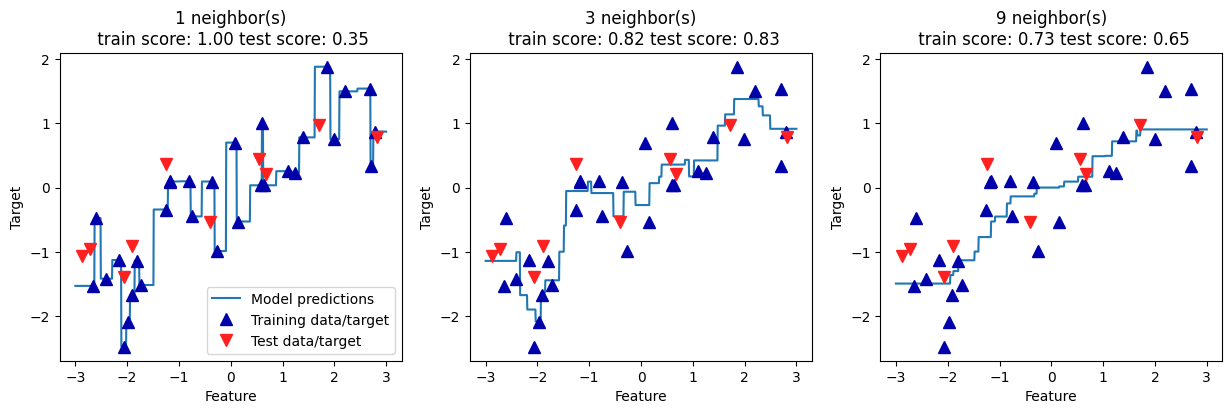

In [94]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# 创建1000个数据点，在-3和3之间均匀分布
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # 利⽤1个、3个或9个邻居分别进⾏预测
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)   # 拟合数据
    
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(f"{n_neighbors} neighbor(s)\n train score: {reg.score(X_train, y_train):.2f} test score: {reg.score(X_test, y_test):.2f}")
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

#只需在第一个图上表上图例即可
axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")


# 朴素⻉叶斯分类
---
训练速度快, 泛化能⼒要⽐线性分类器（如 LogisticRegression 和 LinearSVC ）稍差

它的训练和预测速度都很快，训练过程也很容易理
解。该模型对⾼维稀疏数据的效果很好，对参数的鲁棒性也相对较好。朴素⻉叶斯模型是很好的基准模
型，常⽤于⾮常⼤的数据集，在这些数据集上即使训练线性模型可能也要花费⼤量时间。


# 决策树
---

## 分类树DecisionTreeClassifier

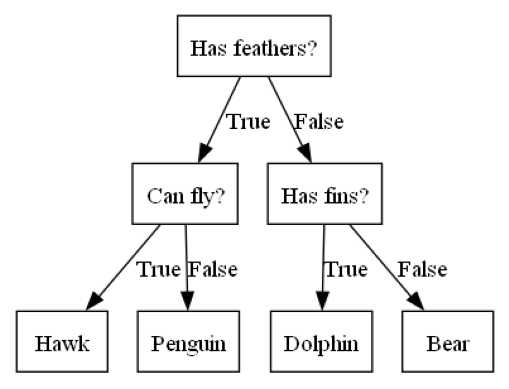

In [3]:
# 输出示范决策树
mglearn.plots.plot_animal_tree()

In [6]:
# 未设置树深度

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier( random_state = 0 )
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.937


未剪枝的树容易过拟合，对新数据的泛化性能不佳, 因此在到达⼀定深度后停⽌树的展开( 设置 max_depth )

In [7]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier( max_depth = 4, random_state = 0 )  # 限制树的深度, 减少过拟合
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


### 树的可视化
我们可以利⽤ graphviz 模块读取这个⽂件并将其可视化

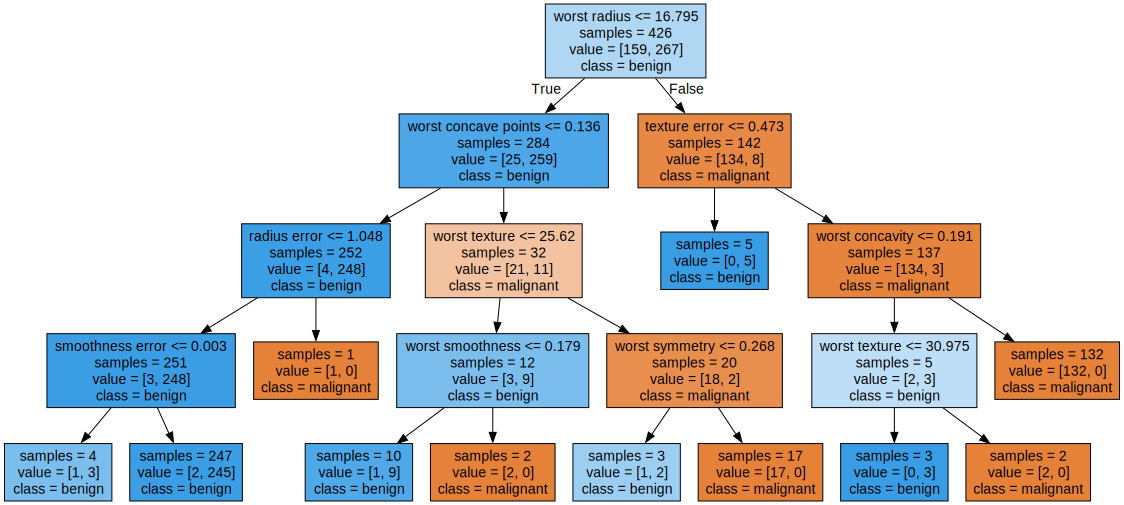

In [9]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant","benign"], # class_names中的类要与feature_names配合
 feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz

with open("tree.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)

### 树的特征重要性 ( . feature_importances_  )

In [12]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


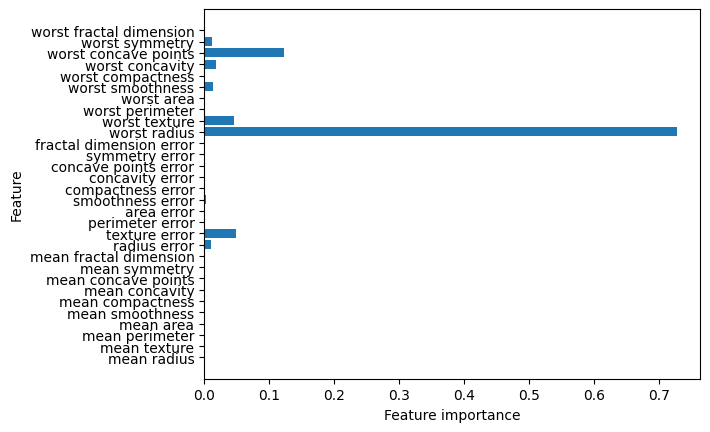

In [13]:
# 可视化
def plot_feature_importances_cancer(model):
     n_features = cancer.data.shape[1]
     plt.barh( range(n_features), model.feature_importances_, align='center' )    # 绘制水平条形图 
     plt.yticks( np.arange(n_features) , cancer.feature_names )         # 文字刻度plt.yticks(np.arange(数量) , feature_names)
     plt.xlabel("Feature importance")
     plt.ylabel("Feature")

plot_feature_importances_cancer(tree)


In [ ]:
有图可知, 'worst radius'是最重要的特征

## 回归树DecisionTreeRegressor
---

重点: **DecisionTreeRegressor（以及其他所有基于树的回归模型）不能外推**

## 决策树模型优缺点

**优点**:-------------------------------------------------

⼀: 得到的模型很容易可视化，⾮专家也很容易理解；

⼆: 算法完全不受数据缩放的影响。由于每个特征被单独处理，⽽且数据的划分也不依赖于缩放，因此决策树不需要特征预处理，⽐如归⼀化或标准化。特别是特征的尺度完全不⼀样时或者⼆元特征和连续特征同时存在时，决策树的效果很好。

**缺点**:-------------------------------------------------

经常过拟合，泛化性能很差

# 随机森林RandomForest

# 梯度提升决策树Gradient boosted DecisionTree